# Building a Face Mask Detection Using Tensorflow

## Importing the Necessary libraries 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

## Let's Do some data Processing to check Insights of data

In [17]:
## Lets Initialize the Learning Rate, No of Epochs, and Batch Size

INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [18]:
## Create a Directory of the Dataset and Required Categories

DIRECTORY = r"C:\Users\Venu\Face Mask Detection using OpenCV and Keras(tensorflow)\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [19]:
## Grab the list of images in the dataset Directory and then initialize the list of data
print("[INFO] loading images...")

[INFO] loading images...


In [20]:
## Creating the Empty list of data and Class images
data = []

## Here labels gonna be with mask and without mask
labels = []

## Applying the loop function to the CATEGORIES i.e., With mask and Without Mask of each Image

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

C:\Users\Venu\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [21]:
# perform one-hot encoding on the labels to convert them to Numerical values(i.e, 0 or 1.)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [22]:
## Converting the list of  data and labels to a array without changing them to array 
# we cannot built deep neural model 

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [23]:
## Now we split the data into train and test sets on the given dataset

x_train, x_test, y_train, y_test  = train_test_split(data, labels, test_size=0.20,random_state=42)


In [24]:
## Construct the training Image generator for Data Augmentation

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

## Building a MobileNetV2 Model to check the accuracy of a model

In [25]:
## load the MobileNetV2 network, ensuring the head FC layer sets are left off

baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

C:\Users\Venu\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [26]:
# Construct the head of the model that will be placed on top of the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [27]:
## Build a Fully connected model on the top of base model(this will become actual model to train)

model = Model(inputs=baseModel.input, outputs=headModel)

In [28]:
# loop over all layers in the base model and freeze them so they will not be updated during the first training process

for layer in baseModel.layers:
    layer.trainable = False
    
## Compiling the lodel
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [29]:
# train the head of the network

print("[INFO] training head...")
H = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
95/95 [==============================] - 326s 3s/step - loss: 0.5336 - acc: 0.7383 - val_loss: 0.4609 - val_acc: 0.7901
Epoch 2/20
95/95 [==============================] - 291s 3s/step - loss: 0.3048 - acc: 0.8754 - val_loss: 0.4046 - val_acc: 0.8201
Epoch 3/20
95/95 [==============================] - 324s 3s/step - loss: 0.2271 - acc: 0.9146 - val_loss: 0.4245 - val_acc: 0.8344
Epoch 4/20
95/95 [==============================] - 387s 4s/step - loss: 0.1891 - acc: 0.9318 - val_loss: 0.5223 - val_acc: 0.8083
Epoch 5/20
95/95 [==============================] - 307s 3s/step - loss: 0.1794 - acc: 0.9311 - val_loss: 0.4546 - val_acc: 0.8435
Epoch 6/20
95/95 [==============================] - 331s 3s/step - loss: 0.1533 - acc: 0.9453 - val_loss: 0.4152 - val_acc: 0.8631
Epoch 7/20
95/95 [==============================] - 316s 3s/step - loss: 0.1539 - acc: 0.9443 - 

95/95 [==============================] - 326s 3s/step - loss: 0.1011 - acc: 0.9618 - val_loss: 0.3432 - val_acc: 0.8918
Epoch 17/20
95/95 [==============================] - 325s 3s/step - loss: 0.0869 - acc: 0.9696 - val_loss: 0.4018 - val_acc: 0.8840
Epoch 18/20
95/95 [==============================] - 328s 3s/step - loss: 0.0955 - acc: 0.9644 - val_loss: 0.3273 - val_acc: 0.8983
Epoch 19/20
95/95 [==============================] - 322s 3s/step - loss: 0.0901 - acc: 0.9693 - val_loss: 0.3794 - val_acc: 0.8918
Epoch 20/20
95/95 [==============================] - 333s 4s/step - loss: 0.0868 - acc: 0.9703 - val_loss: 0.4199 - val_acc: 0.8840


In [30]:
# Make predictions on the testing set

print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=BS)

[INFO] evaluating network...


In [31]:
# for each image in the testing set we need to find the index of the label 
# with corresponding largest predicted probability

predIdxs = np.argmax(predIdxs, axis=1)

In [32]:
# Showing the nicely formatted classification report

print(classification_report(y_test.argmax(axis=1), predIdxs, target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.79      0.88       406
without_mask       0.80      0.99      0.89       361

    accuracy                           0.88       767
   macro avg       0.90      0.89      0.88       767
weighted avg       0.90      0.88      0.88       767



In [33]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("Mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


In [34]:
print(H.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


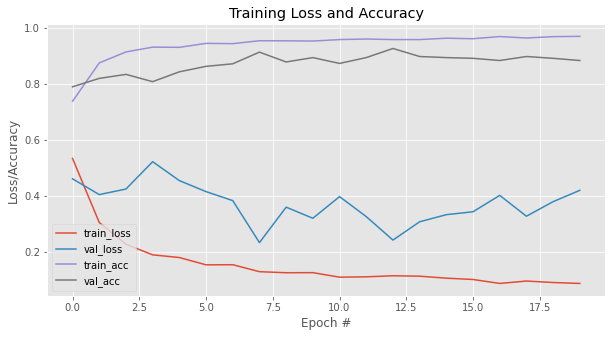

In [35]:
## Lets summarize the history of Accuracy and Loss
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")